In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.style.use("seaborn")

In [47]:
water = [2, 3.7, 6,25, 7.9, 9.8, 10.5, 12.4, 13.3, 15.1, 16.5, 17.8, 18.8, 19.8, 20.6, 22.2, 23.1,24.5, 25.5, 26.2]

20


## Import elevation data

In [7]:
raw = pd.read_csv('pgh.csv')
df = raw.copy().iloc[::2]  # account for duplicate data
df.head()

,Distance from start(meters),elevation(meters),accumulated ascent(meters),accumulated descent(meters)
0,0.00,255.81,0.0,0.00
2,51.68,244.44,0.0,-11.37
4,217.56,254.64,10.2,-11.37
6,241.26,251.44,10.2,-14.57
8,264.44,248.69,10.2,-17.32


In [8]:
df['percent grade'] = np.gradient(df['elevation(meters)'], df['Distance from start(meters)'])*100
df.head()

,Distance from start(meters),elevation(meters),accumulated ascent(meters),accumulated descent(meters),percent grade
0,0.00,255.81,0.0,0.00,-22.000774
2,51.68,244.44,0.0,-11.37,-15.313968
4,217.56,254.64,10.2,-11.37,-11.045459
6,241.26,251.44,10.2,-14.57,-12.673806
8,264.44,248.69,10.2,-17.32,-11.534152


In [39]:
df['Distance from start(mi)'] = df['Distance from start(meters)']/1609.344
df['elevation(mi)'] = df['elevation(meters)']/1609.344

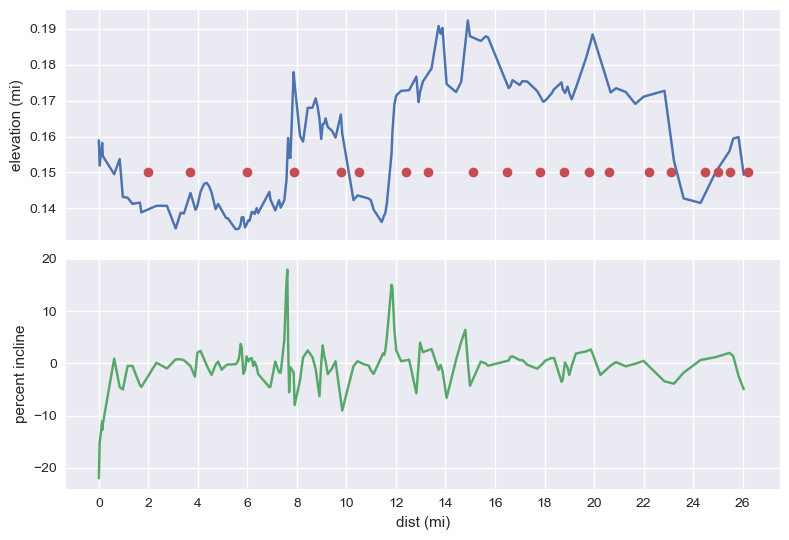

In [51]:
fig, ax = plt.subplots(2,1, sharex=True, dpi=100)
ax[0].plot(df['Distance from start(mi)'], df['elevation(mi)'])
ax[0].set_ylabel('elevation (mi)')
ax[0].plot(water, [0.15]*20, 'o', color='C2')
ax[1].plot(df['Distance from start(mi)'], df['percent grade'], color='C1')
ax[1].set_ylabel('percent incline')
plt.xlabel('dist (mi)')
plt.xticks(np.arange(0,27,2))
plt.tight_layout()

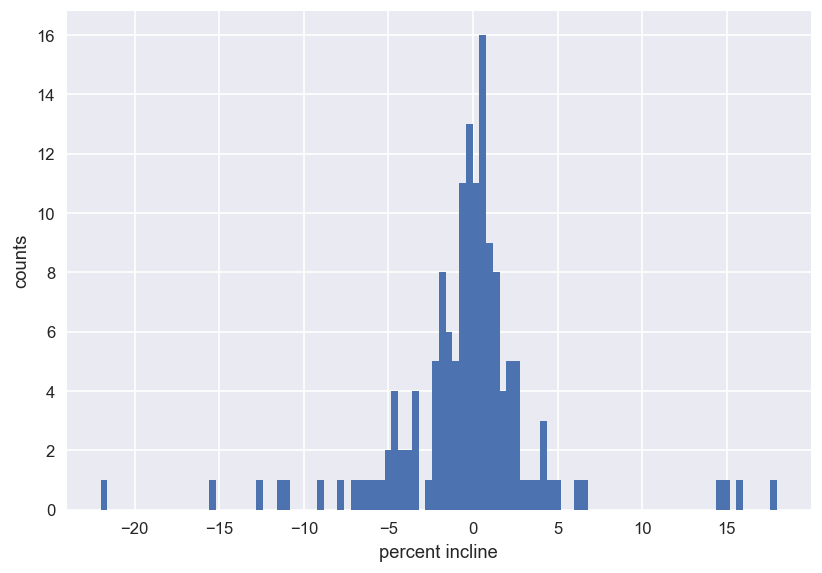

In [58]:
plt.figure(dpi=120)
plt.hist(df['percent grade'], bins=100);
plt.xlabel('percent incline');
plt.ylabel('counts');

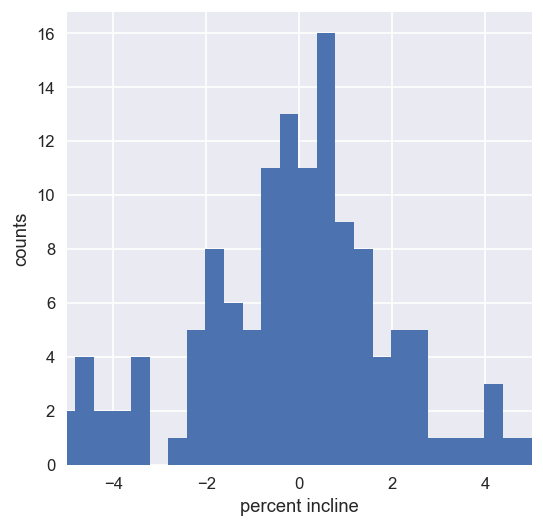

In [57]:
plt.figure(dpi=120, figsize=(5,5));
plt.hist(df['percent grade'], bins=100);
plt.xlim(-5,5);
plt.xlabel('percent incline');
plt.ylabel('counts');